---
title: Klasse F  Versterkers
subtitle: Hoogfrequentversterker met een enkele drive transistor
authors:
  - name: Jan Genoe
    orcid: 0000-0002-4019-5979
    affiliations:
      - KU Leuven
      - imec
bibliography:
  - ToegepasteAnalogeElektronica.bib
---

# Klasse F Verstekers

In dit hoofdstuk bestuderen we de klasse F versterker als een uitbreiding van de klasse C versterker. Beide versterkers zijn resonante versterkers die bestaat uit een LRC trilkring (of meerdere LC kringen) die aangestuurd wordt door een enkele transistor. Als een gevolg hiervan werkt deze versterker op een vaste frequentie of binnen een zeer beperkte bandbreedte rond deze centrale frequentie. Deze bandbreedte is typisch maximaal 1%  van de resonantie frequentie.
In {numref}`vermogenversterkers2` geven we een overzicht van deze verschillende versterkers.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkers2

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - Klasse A
  - Klasse C <BR> **Klasse F** <BR>Klasse E
* - 2 of meer  transistors in de vermogentrap
  - Klasse B  <BR> Klasse G
  - Klasse D
:::

In [1]:
from cursusdef import *



Wanneer de gelijkaardige stroompulsen aangelegd worden op 2 parallelle LRC kringen in serie, zal dezelfde stroom door de kringen lopen, maar zullen de spanningen over beide kringen opgeteld worden.

###### Basisschema van de klasse F versterker

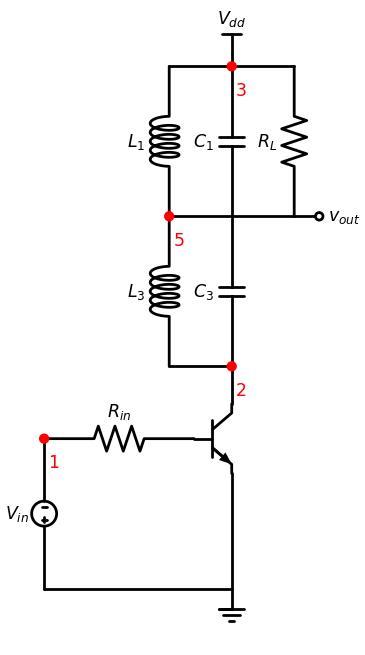

In [5]:
with schemdraw.Drawing() as d:
    d += (T := BjtNpn())
    d += (Ri := Resistor( d='left', xy=T.base, label='$R_{in}$'))
    #d.labelI(Ri, 'input current')
    d += (dot1 := Dot( color='red').label('1',  loc='center', ofst=[.3,-.3]))
    d += (Vi := SourceV(d='down',label='$V_{in}$', zoom=0.5))
    d += ( Line(d='right',  tox=T.emitter))
    d += ( Ground())
    d += ( Line(d='up',  toy=T.emitter))
    d += ( Line( xy=T.collector, d='up', l=0.75))
    d += (dot2 := Dot( color='red').label('2',  loc='center', ofst=[.3,-.3]))
    d += (C3 := Capacitor( d='up', label='$C_3$'))
    d += ( Line( xy=C3.start, d='left', l=1.25))
    d += (L3 := Inductor2( d='up', label='$L_3$'))
    d += (dot5 := Dot( color='red').label('5',  loc='center', ofst=[.3,-.3]))
    d += (C1 := Capacitor( xy=C3.end, d='up', label='$C_1$'))
    d += ( Line( xy=C1.start, d='left', l=1.25))
    d += (L1 := Inductor2( d='up', label='$L_1$'))
    d += ( Line( xy=C1.start, d='right', l=1.25))
    d += (R := Resistor( d='up', label='$R_L$'))
    d += ( Line( xy=R.start, d='right', l=0.5))
    d += (dot := Dot(open=True, rgtlabel='$v_{out}$'))
    d += ( Line(xy=R.end, d='left', tox=C1.end))
    d += (dot3 := Dot( color='red').label('3',  loc='center', ofst=[.3,-.3]))
    d += ( Line( d='right',xy=L1.end, tox=C1.end))
    d += ( Line( d='up',l=0.25))
    d += ( Vdd( label='$V_{dd}$'))

###### Spice code van de klasse F versterker

```{literalinclude} ./simul/classF.sp
:language: spice
:name: eSpicef
:caption: basis Klasse F circuit spice file
```

In [3]:
spicelisting("simul/classF.sp")

* klasse F basiscircuit
Q_Q1         2 1 0 Q2
L_L1         5 3   1uH
C_C1         5 3   10n
R_R1         5 3   60
V_V3         3 0   11V
V_V5         1 0   sin(0.7 0.8 1591500) DC=0.7
C_C3         5 2   10n
L_L3         5 2   0.111uH
.model Q2  NPN(Is=14.34f BF=200 RB=200 )

###### Spanningen op de verschillende knopen van de klasse F versterker.

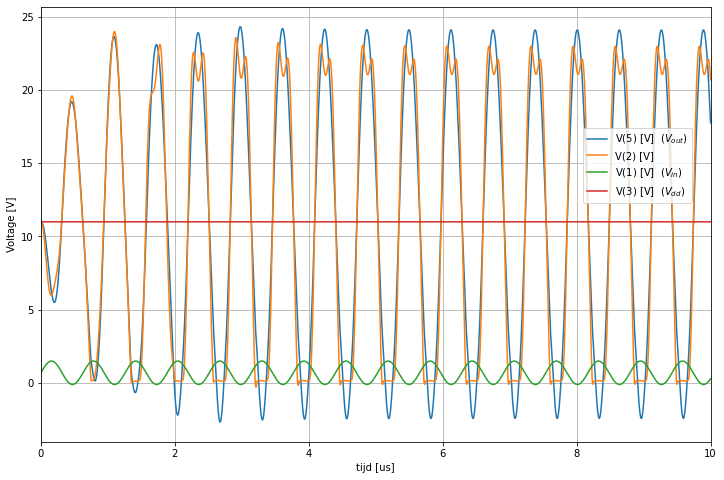

In [4]:
circuit=SpiceParser(path='simul/classF.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2e-10, end_time=end_time)

figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.legend( loc=(0.81,.55))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

Wanneer we op basis van de spanningen bekomen in de bovenstaande figuur de spanningen over de trilkring van de eerste harmonische en de spanningen over de trilkring van de derde harmonische plotten, zien we dat op moment dat de eerste harmonische een minimum bereikt, de derde harmonische piekt. Dit heeft een belangrijk voordeel, namelijk de spanning over het totale circuit wordt kleiner of er kan met dezelfde spanning een veel grotere swing bekomen worden.

###### Verloop van de spanning over de eerste (LC1) en over de derde (LC3) harmonische.

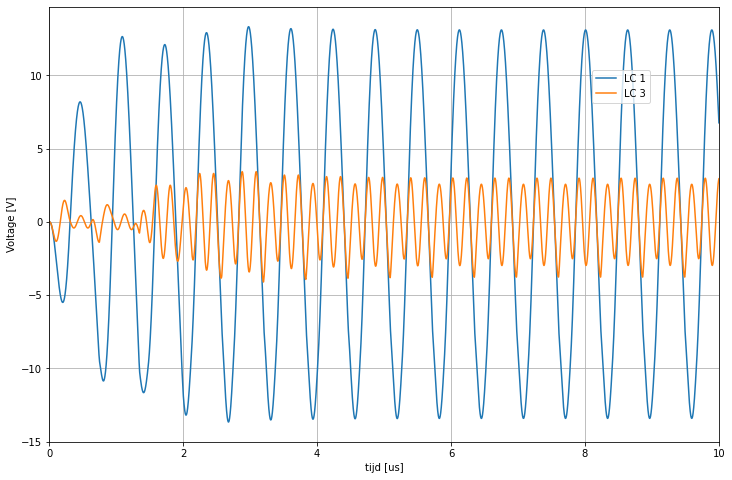

In [5]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['5']-analysis.nodes['3'],label='LC 1')
ax.plot(analysis.time*1e6,analysis.nodes['2']-analysis.nodes['5'],label='LC 3' )
ax.legend( loc=(0.81,.78))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

###### Verloop van de collector current

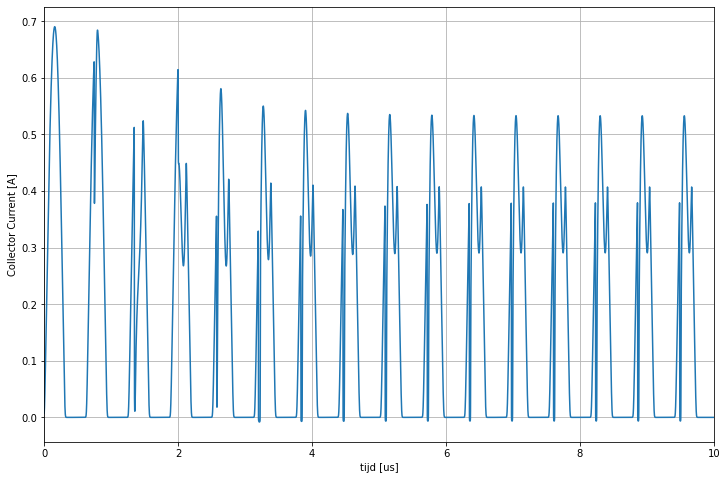

In [6]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,-analysis.branches['v_v3'],label='v_v3')
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Collector Current [A]')
plt.show()

###### Basisschema van de klasse F versterker waarbij de uitgang oscilleert rond de grond.

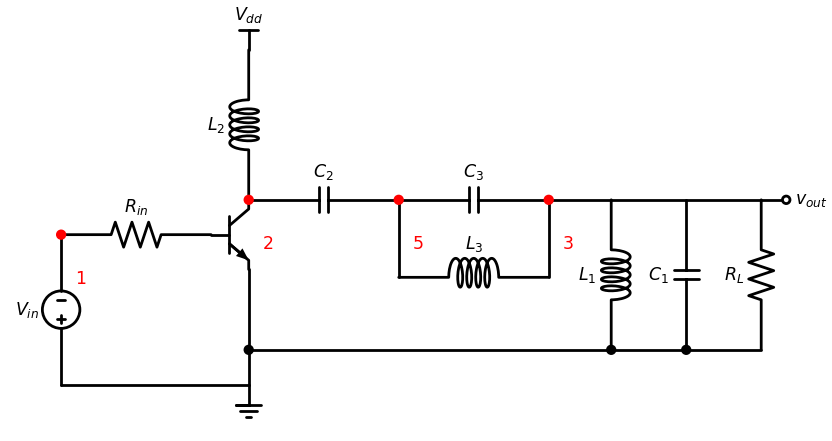

In [7]:
with schemdraw.Drawing() as d:
    d += (T := BjtNpn())
    d += (Ri := Resistor( d='left', xy=T.base, label='$R_{in}$'))
    d += (dot1 := Dot(color='red').label('1',  loc='center', ofst=[.5,-.7]))
    #d.labelI(Ri, 'input current')
    d += (Vi := SourceV(d='down',label='$V_{in}$',zoom=0.75))
    d += ( Line(d='right',  tox=T.emitter))
    d += ( Ground())
    d += ( Line(d='up',  toy=T.emitter))
    d += (dot2 := Dot( xy=T.collector,color='red').label('2',  loc='center', ofst=[.5,-.7]))
    d += (L2 := Inductor2( d='up', label='$L_2$'))
    d += ( Vdd( label='$V_{dd}$'))
    d += (C2 := Capacitor( xy=T.collector, d='right', label='$C_2$'))
    d += (dot5 := Dot(color='red').label('5',  loc='center', ofst=[.5,-.7]))
    d += (C3 := Capacitor( d='right', label='$C_3$'))
    d += ( Line( xy=C3.start, d='down', l=1.55))
    d += (L3 := Inductor2( d='right', label='$L_3$'))
    d += ( Line( d='up', l=1.55))
    d += (dot3 := Dot(color='red').label('3',  loc='center', ofst=[.5,-.7]))
    d += Line( d='right', l=1.25)
    d += (L1 := Inductor2( d='down', label='$L_1$'))
    d += Line( xy=L1.start, d='right', l=1.5)
    d += (C1 := Capacitor( d='down', label='$C_1$'))
    d += Line( xy=C1.start, d='right', l=1.5)
    d += (R := Resistor( d='down', label='$R_L$'))
    d += Line( xy=R.start, d='right', l=0.5)
    d += Dot(open=True, rgtlabel='$v_{out}$')
    d += Line(xy=R.end, d='left', tox=C1.end)
    d += Dot()
    d += Line( d='left',xy=C1.end, tox=L1.end)
    d += Dot()
    d += Line( xy=L1.end,  tox=T.emitter, d='left')
    d += Dot()

###### Klasse F versterker met oscillatie rond de grond

```{literalinclude} ./simul/classF.sp
:language: spice
:name: listingf2
:caption: Klasse F circuit waarbij de uitgang oscilleert rond de grond
```

In [4]:
spicelisting('simul/classF2.sp')

* klasseF
Q_Q1         2 1 0 Q2
L_L1         0 3   1uH
C_C1         0 3   10n
R_R1         0 3   100
V_V3         4 0   10V
V_V5         1 0   sin(0.4 0.8 1591500) DC=0.4
C_C2         5 3   10n
L_L3         6 3   0.111uH
R_R3         6 5   0.001
L_L2         2 4   2mH
C_C3         2 5   1000n
.model Q2  NPN(Is=14.34f BF=200 Rb=100 )

###### Spice simulatie van de Klasse F waarbij de uitgang oscilleert rond de grond.

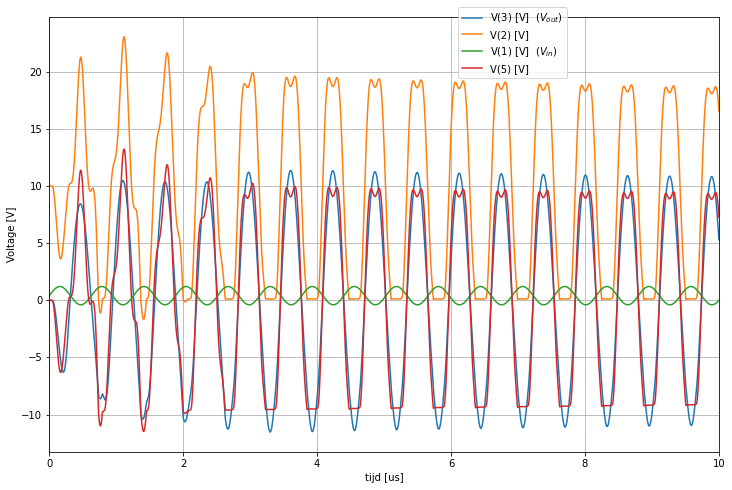

In [9]:
circuit=SpiceParser(path='simul/classF2.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2e-10, end_time=end_time)

figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V] ' )
ax.legend( loc=(0.61,.86))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

###### Spice simulatie van de Klasse F waarbij de uitgang oscilleert rond de grond. Verloop van de spanning over de eerste (LC1) en over de derde (LC3) harmonische.

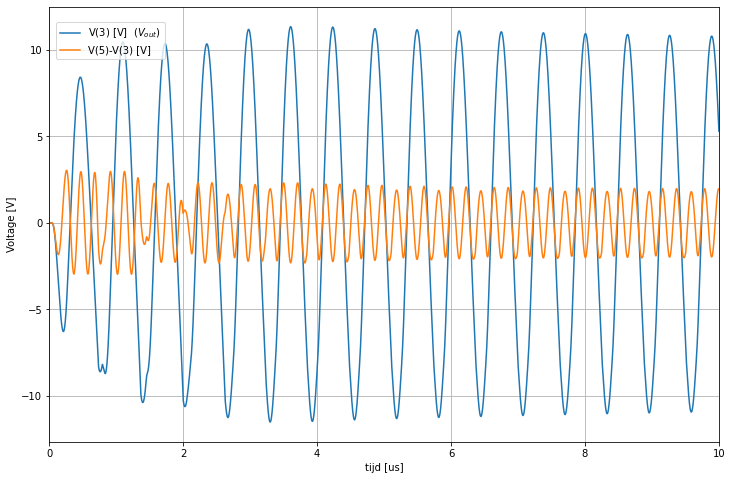

In [10]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['5']-analysis.nodes['3'],label='V(5)-V(3) [V]' )
ax.legend( loc=(0.01,.88))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()